# KNeighborsRegressor
The Data has already been processed earlier. 
So I will use what I have.

## A First Pass

In [25]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
import random 
random.seed(0)

pd.options.display.float_format = '{:.2f}'.format

In [26]:
os.getcwd()
#os.chdir('c:\\Users\\amcfa\\gitfiles\\Projects\\MastersWork\\shorter_ML_Projects\\Machine-Learning-_-Prediction')
X1=pd.read_csv(os.getcwd()+ '/X1.csv')
X2=pd.read_csv(os.getcwd()+ '/X2.csv')
from sklearn.utils import shuffle
X1 = shuffle(X1)
X2=shuffle(X2)
y_train=X1['Data_x'].reset_index(drop=True) # Separating all of the data
y_test=X2['Data_x'].reset_index(drop=True)
X_train = X1.iloc[:,3: ]
X_test = X2.iloc[:,3: ]

In [27]:
X_train.head()

,GERCB,HLRCV,LORCB,NGRCV,PERCV,PQRCB,PQRCP,PQRCV,SORCB,SOTXB,TERCB,TERCV,TNRCB,TNRSB,WDRCV,StateCode,Year1
2298,0.00,18.20,119001.00,86.70,242.40,0.00,0.00,0.00,0.00,0.00,322393.00,588.10,203392.00,192569.00,4.00,45,3
415,0.00,5.70,14599.00,23.40,72.30,0.00,0.00,0.00,0.00,0.00,43536.00,171.60,28937.00,27834.00,0.80,8,7
2395,29.00,204.20,2033.00,54.40,548.50,7063.00,1839.00,204.20,926.00,1454.00,47878.00,917.30,45845.00,39153.00,60.20,46,49
2091,0.00,13.40,13089.00,14.30,34.20,0.00,0.00,0.00,0.00,0.00,45466.00,76.20,32377.00,31832.00,0.10,41,0
2500,0.00,2.50,30634.00,52.20,65.20,0.00,0.00,0.00,0.00,0.00,113957.00,151.00,83323.00,79444.00,1.30,49,1


Created a pipeline here.

In [75]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
                    KNeighborsRegressor(weights='distance'))
y_pred=reg.fit(X_train, y_train).predict(X_test)

In [76]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1


,true,predicted,how_off
0,944.60,851.60,9.85
1,946.20,847.24,10.46
2,6789.20,6440.95,5.13
3,4741.60,4506.74,4.95
4,6289.80,4952.01,21.27
5,3669.20,3651.84,0.47
6,4647.90,4246.41,8.64
7,6167.80,5710.27,7.42
8,3843.70,3379.63,12.07
9,4037.50,3942.86,2.34


The results were actually really good right out of the box


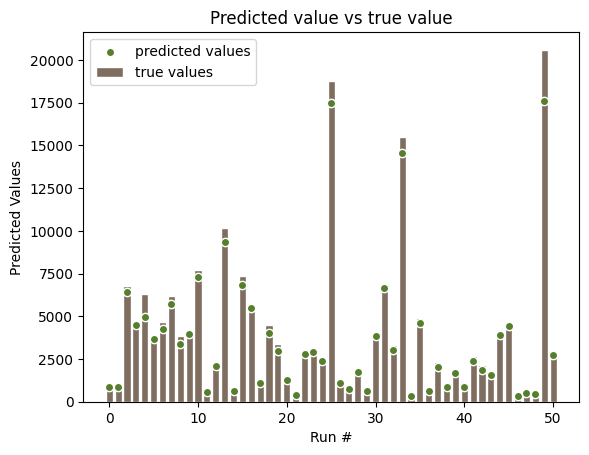

In [77]:
r1 = np.arange(len(results_trial1['true']))

plt.bar(r1, results_trial1['true'], color='#7f6d5f', edgecolor='white', label='true values')
plt.scatter(r1, results_trial1['predicted'], color='#557f2d', edgecolor='white', label='predicted values')
plt.xlabel('Run #')
plt.ylabel('Predicted Values')
plt.title('Predicted value vs true value')

plt.legend()

In [78]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 304.96264976093306
Mean squared error 324398.3801414868
('Explained variance score', 0.9873327384716359)
('R_2 score', 0.9822565246398507)


## Parameter Optimazation

The model performed decently well.



In [79]:
m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(KNeighborsTransformer(), KNeighborsRegressor(n_neighbors=i,weights='distance'))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T
 

<Axes: >

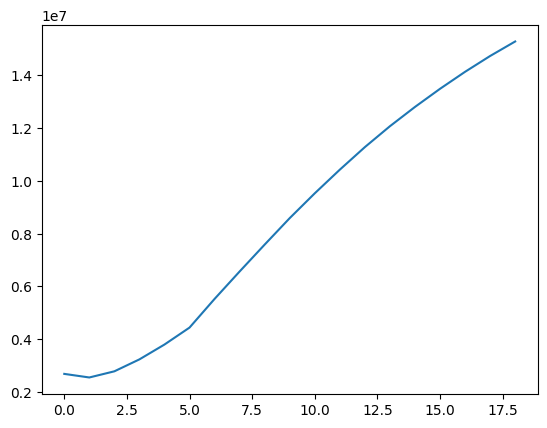

In [80]:
a=pqr.T
b=len(a)
r1 = np.arange(len(a[1]))
a[1].plot(x=r1,y=a[1])

In [81]:
a

,0,1,2,3
0,918.05,2683516.24,0.90,0.85
1,1014.44,2547424.22,0.91,0.86
2,1111.45,2780677.24,0.92,0.85
3,1242.61,3233021.90,0.91,0.82
4,1379.69,3795207.78,0.90,0.79
5,1528.52,4437016.89,0.89,0.76
6,1710.33,5523157.62,0.86,0.70
7,1852.09,6562209.62,0.83,0.64
8,1990.88,7581459.38,0.80,0.59
9,2116.15,8584004.74,0.78,0.53


In [82]:
m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=i,weights='distance'))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T

<Axes: >

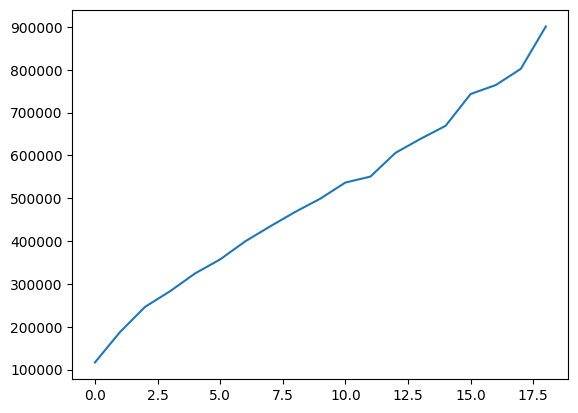

In [83]:
a=pqr.T
b=len(a)
r1 = np.arange(len(a[1]))
a[1].plot(x=r1,y=a[1])

In [84]:
a

,0,1,2,3
0,199.84,116427.04,1.00,0.99
1,233.20,187289.93,0.99,0.99
2,259.29,246134.48,0.99,0.99
3,281.68,282784.42,0.99,0.98
4,304.96,324398.38,0.99,0.98
5,319.72,357105.71,0.99,0.98
6,339.76,399212.76,0.98,0.98
7,352.50,434387.49,0.98,0.98
8,364.97,468129.49,0.98,0.97
9,369.44,499066.29,0.98,0.97


Not much better. changing p value

In [88]:
m=20
abc=[]
defg=[]
for i in range(1,m):
	regr = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=i,weights='distance',p=1))
	y_pred=regr.fit(X_train, y_train).predict(X_test)
	abc.append((mean_absolute_error(y_true, y_pred),
            mean_squared_error(y_true, y_pred),explained_variance_score(y_true, y_pred),r2_score(y_true, y_pred)))
	defg.append(y_true)
	pqr=pd.DataFrame(abc).T

<Axes: >

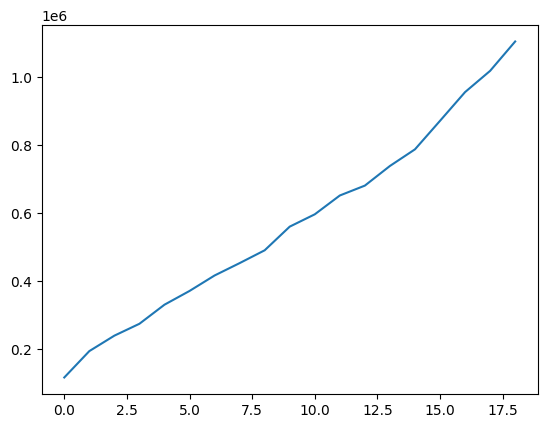

In [90]:
a=pqr.T
b=len(a)
r1 = np.arange(len(a[1]))
a[1].plot(x=r1,y=a[1])

In [91]:
a

,0,1,2,3
0,199.85,117033.17,1.00,0.99
1,232.27,194491.09,0.99,0.99
2,247.91,239915.05,0.99,0.99
3,270.20,274808.70,0.99,0.98
4,301.30,330876.18,0.99,0.98
5,320.80,371229.15,0.99,0.98
6,338.11,416677.76,0.98,0.98
7,353.76,453033.20,0.98,0.98
8,369.82,490712.44,0.98,0.97
9,387.85,560237.14,0.98,0.97


In [23]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(2)

,true,predicted,how_off
0,944.60,739.93,21.67
1,958.10,723.63,24.47


In [10]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 3882.286425252689
Mean squared error 33304281.80976962
('Explained variance score', 0.002764998801576435)
('R_2 score', -0.8216296376738408)


### Changing the penatly term

Changing the penalty term from `l2` to `l1`. Improved results quite a bit. 

In [11]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(penalty='l1'))
y_pred=reg.fit(X_train, y_train).predict(X_test)

In [12]:
y_true =y_test
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=pd.DataFrame(y_pred,y_true).reset_index()
results_trial1=results_trial1.rename(columns={'Data_x':'true',0:'predicted'})
results_trial1['how_off']= ((results_trial1['true']-results_trial1['predicted'])/results_trial1['true'])*100
results_trial1.head(2)

,true,predicted,how_off
0,958.10,957.74,0.04
1,623.90,624.00,-0.02


In [13]:
print('Mean absolute Error',mean_absolute_error(y_true, y_pred))
print('Mean squared error', mean_squared_error(y_true, y_pred))
print(('Explained variance score',explained_variance_score(y_true, y_pred)))
print(('R_2 score',r2_score(y_true, y_pred)))

Mean absolute Error 0.9515905031620266
Mean squared error 1.394251383994719
('Explained variance score', 0.9999999510717904)
('R_2 score', 0.999999923739246)


# Results
Pretty straightforward actually. 


The SVGR performed very well. With a prediction accuracy of 100%.

The `MAE` was 0.9834673843854801\
The `MSE` was 1.5266552927792496\
The `Explained variance` was 0.9999999450342941\
The $ R^2 $ was 0.9999999164972077